In [24]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

data = pd.read_json("logins.json")
data.head(40)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [25]:
pd.to_datetime(data['login_time'], unit='s').dt.date

0        1970-01-01
1        1970-01-01
2        1970-01-01
3        1970-01-01
4        1970-01-01
            ...    
93137    1970-04-13
93138    1970-04-13
93139    1970-04-13
93140    1970-04-13
93141    1970-04-13
Name: login_time, Length: 93142, dtype: object

In [26]:
len(data)

93142

In [27]:
(min(data['login_time']), max(data['login_time']))

(Timestamp('1970-01-01 20:12:16'), Timestamp('1970-04-13 18:57:38'))

In [28]:
(max (data['login_time']) - min (data['login_time']) ) / datetime.timedelta(minutes=15)

9787.024444444445

In [29]:
type(data), type(data.iloc[0]), type(data.iloc[0][0])

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas._libs.tslibs.timestamps.Timestamp)

In [30]:
data['range'] = pd.cut(data.login_time,9787)
timecounts = data.groupby('range')['login_time'].count()

In [31]:
type(timecounts), type(timecounts[0])

(pandas.core.series.Series, numpy.int64)

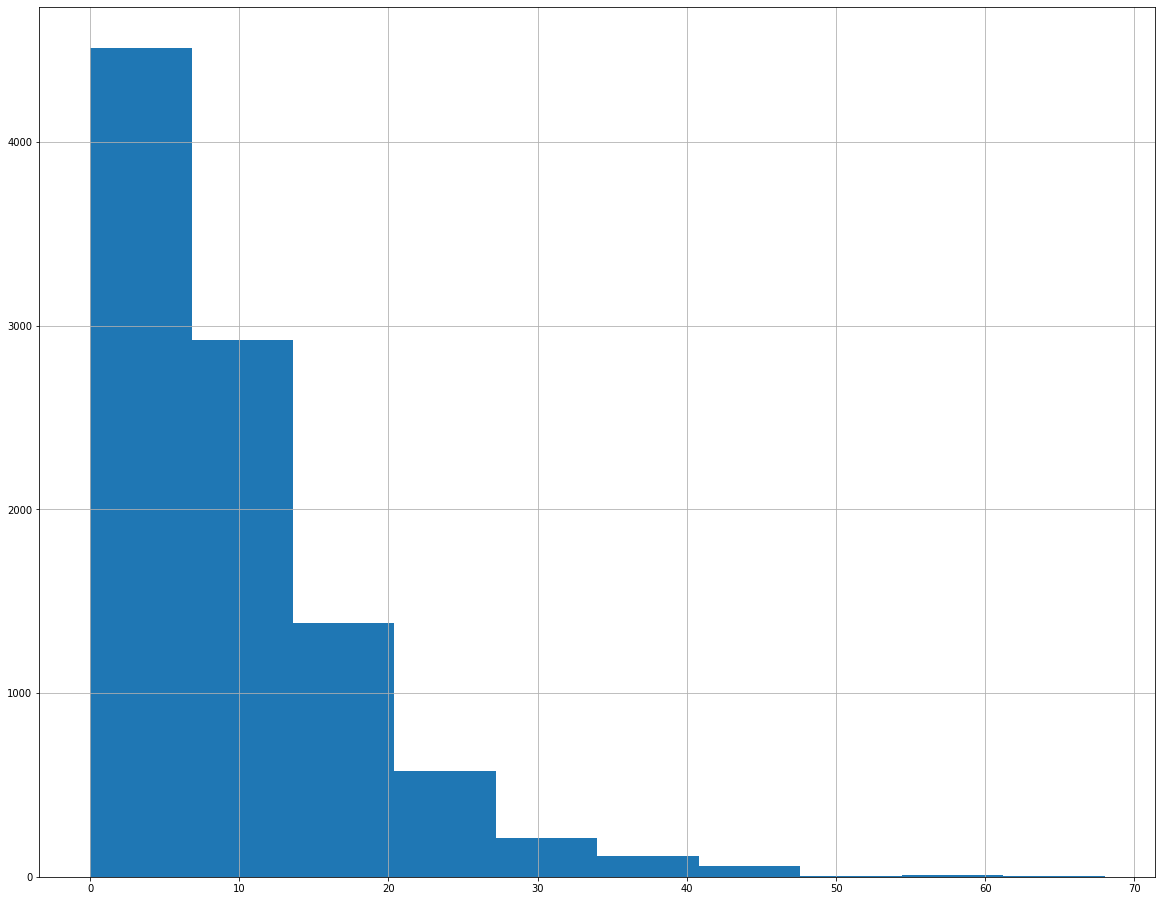

In [32]:
timecounts.hist()

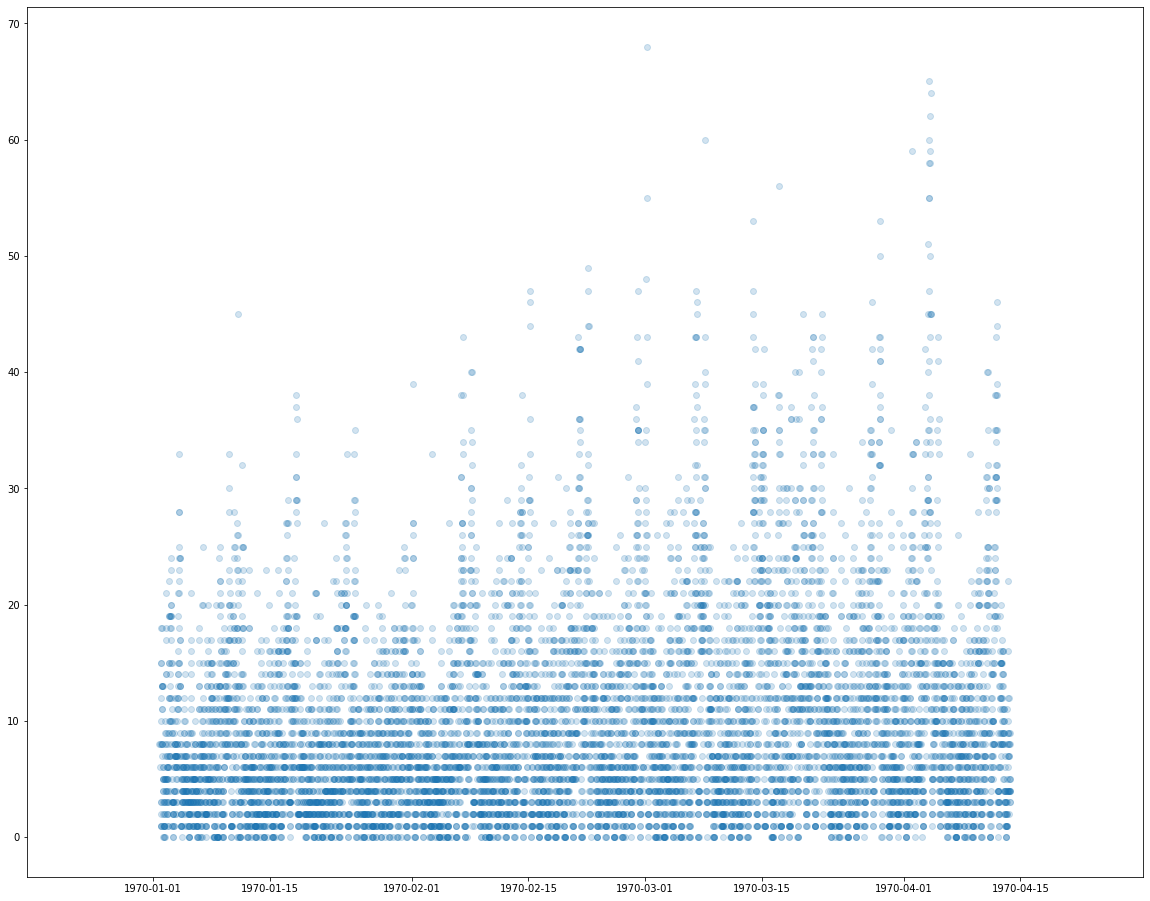

In [33]:

start_times = [timecounts.index[a].left for a in range(len(timecounts))]
plt.rcParams["figure.figsize"] = (20,16)
plt.scatter(start_times, timecounts.values, alpha = 0.2)
plt.show()

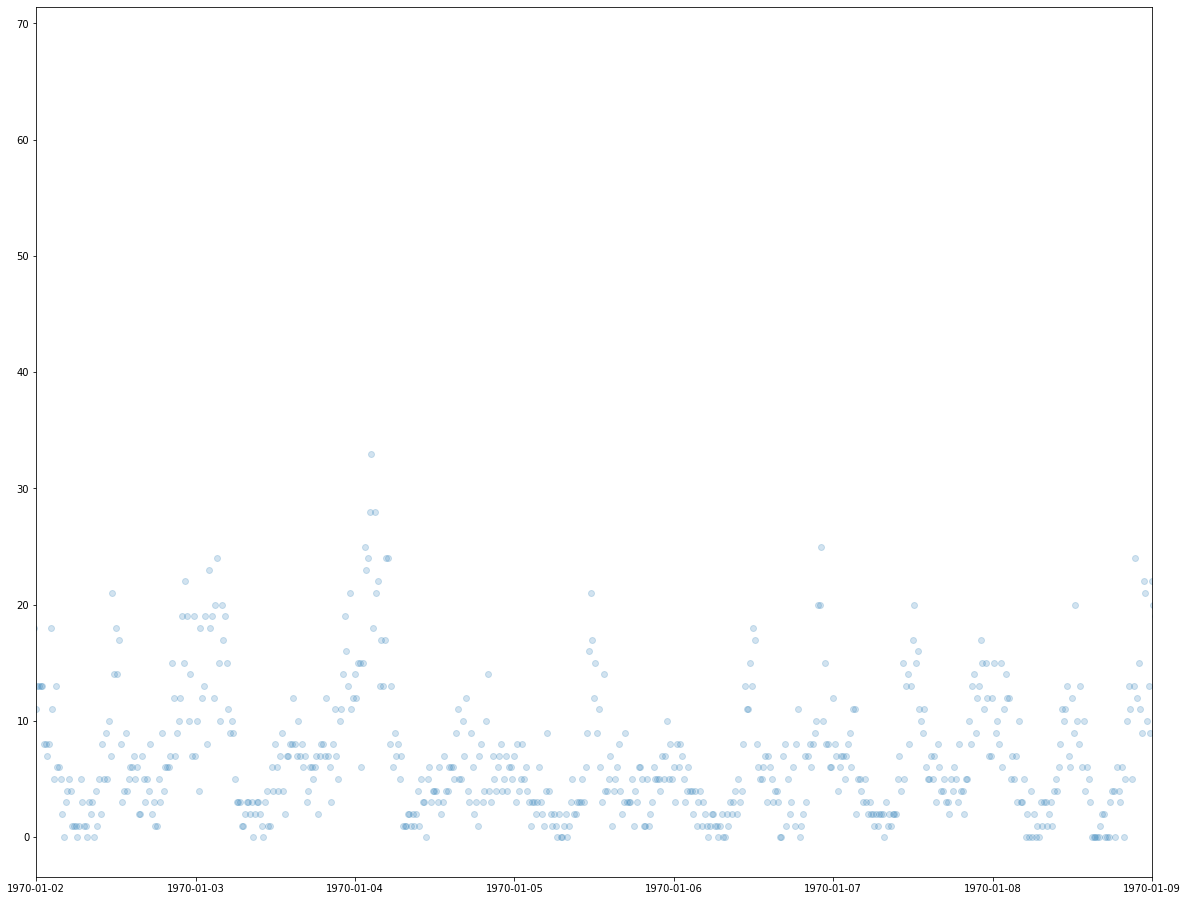

In [34]:
plt.scatter(start_times, timecounts.values, alpha = 0.2)
plt.xlim('1970-01-02', '1970-01-09')
plt.show()